In [94]:
!pip install missingno

Etape 1 : Importer les librairies necessiares pour le traitement des données (ajoute plus d'explication plus tard)

In [98]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Dans l'analyse des séries temporelles, on observe l'évolution de la variable target en fonction du temps, mais on va remarquer que si on trace directement les plot, on va avoir les numéro de lignes sur l'axe des abcisse. Il va valoir donc définir un nouvel indice = time, pour cela, on doit indiquer dès le début quand on importe les données que la colomne :'A décider plus tard' est index column.
Cette astuce peut être utilisée pour toutes les séries temporelles, dès que tu importe ton fichier, tu indique directement que ton indice est le temps.
Aussi, on dois indiquer à pandas, que cette colonne doit être interprétée comme une date, poue cela, on va dans la même cellule d'importation, on ajoute parse_dates = True, et on remarque que quand on execute la cellule df.index, ça affiche type = datetime.
A ajouter : , index_col='date_added', parse_dates=True

In [99]:
data = pd.read_csv('netflix_titles.csv')

Bonne pratique : toujours créer une copie de la dataframe pour ne pas modifier l'originale

In [100]:
df = data.copy()

Afficher les 5 première lignes

In [101]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Afficher les 5 dernière lignes

In [102]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Afficher la taille de la dataframe / dimentionnalité

In [103]:
df.shape

(8807, 12)

Afficher les colonnes

In [104]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Affichez les informations du DataFrame, notamment le type d'index et les colonnes, les valeurs non nulles et l'utilisation de la mémoire

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Le nombre de variables pour chaque types : object, int

In [106]:
df.dtypes.value_counts()

object    11
int64      1
Name: count, dtype: int64

On remarque qu'il y a 1 int (quantitative) qui est release_year et 11 object (à l'exception de la première colonne qui n'est pas prise en compte (index)). Cependant, le variable duration n'est pas normalisée

Le nombre de valeurs nulles de chaque colonnes (s'ils existents)

In [107]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Dire si oui ou non, il y a des valeurs manquantes (NaN)

In [108]:
df.isnull().sum().any()

True

La proportion en pourcentage = le rapport entre la somme des valeurs nulles de chaque colonne et la somme totale des valeurs

In [109]:
proportion = (df.isnull().sum() / df.shape[0]) * 100

In [110]:
proportion

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Analyse de valeurs manquantes : 
1 - On peut utiliser directement seaborn pour créer une heatmap
2 - On peut importer la bibliothèque missingno et utiliser matrix, heatmap, dendrogram, bar (Ajoute un markdown pour chaque cellule)

<Axes: >

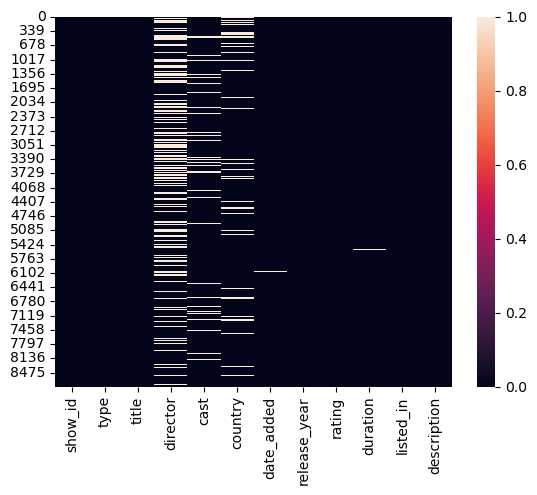

In [111]:
sns.heatmap(df.isna(), cbar=True)

<Axes: >

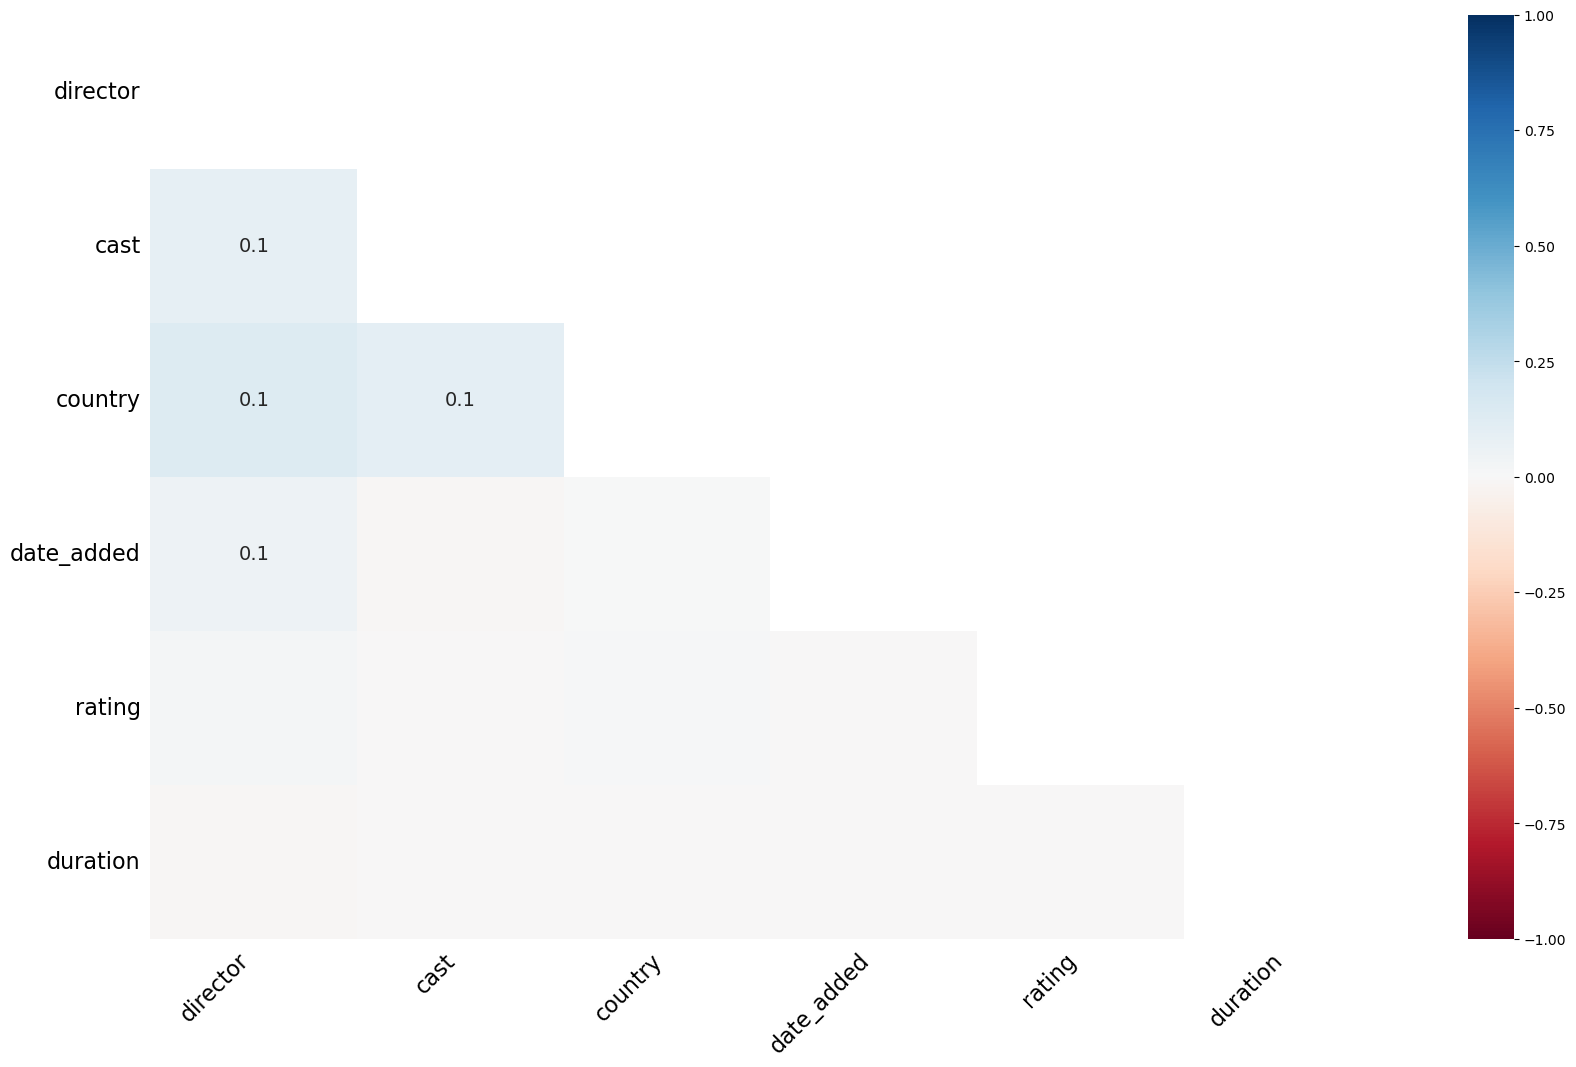

In [112]:
msno.heatmap(df, cbar=True)

<Axes: >

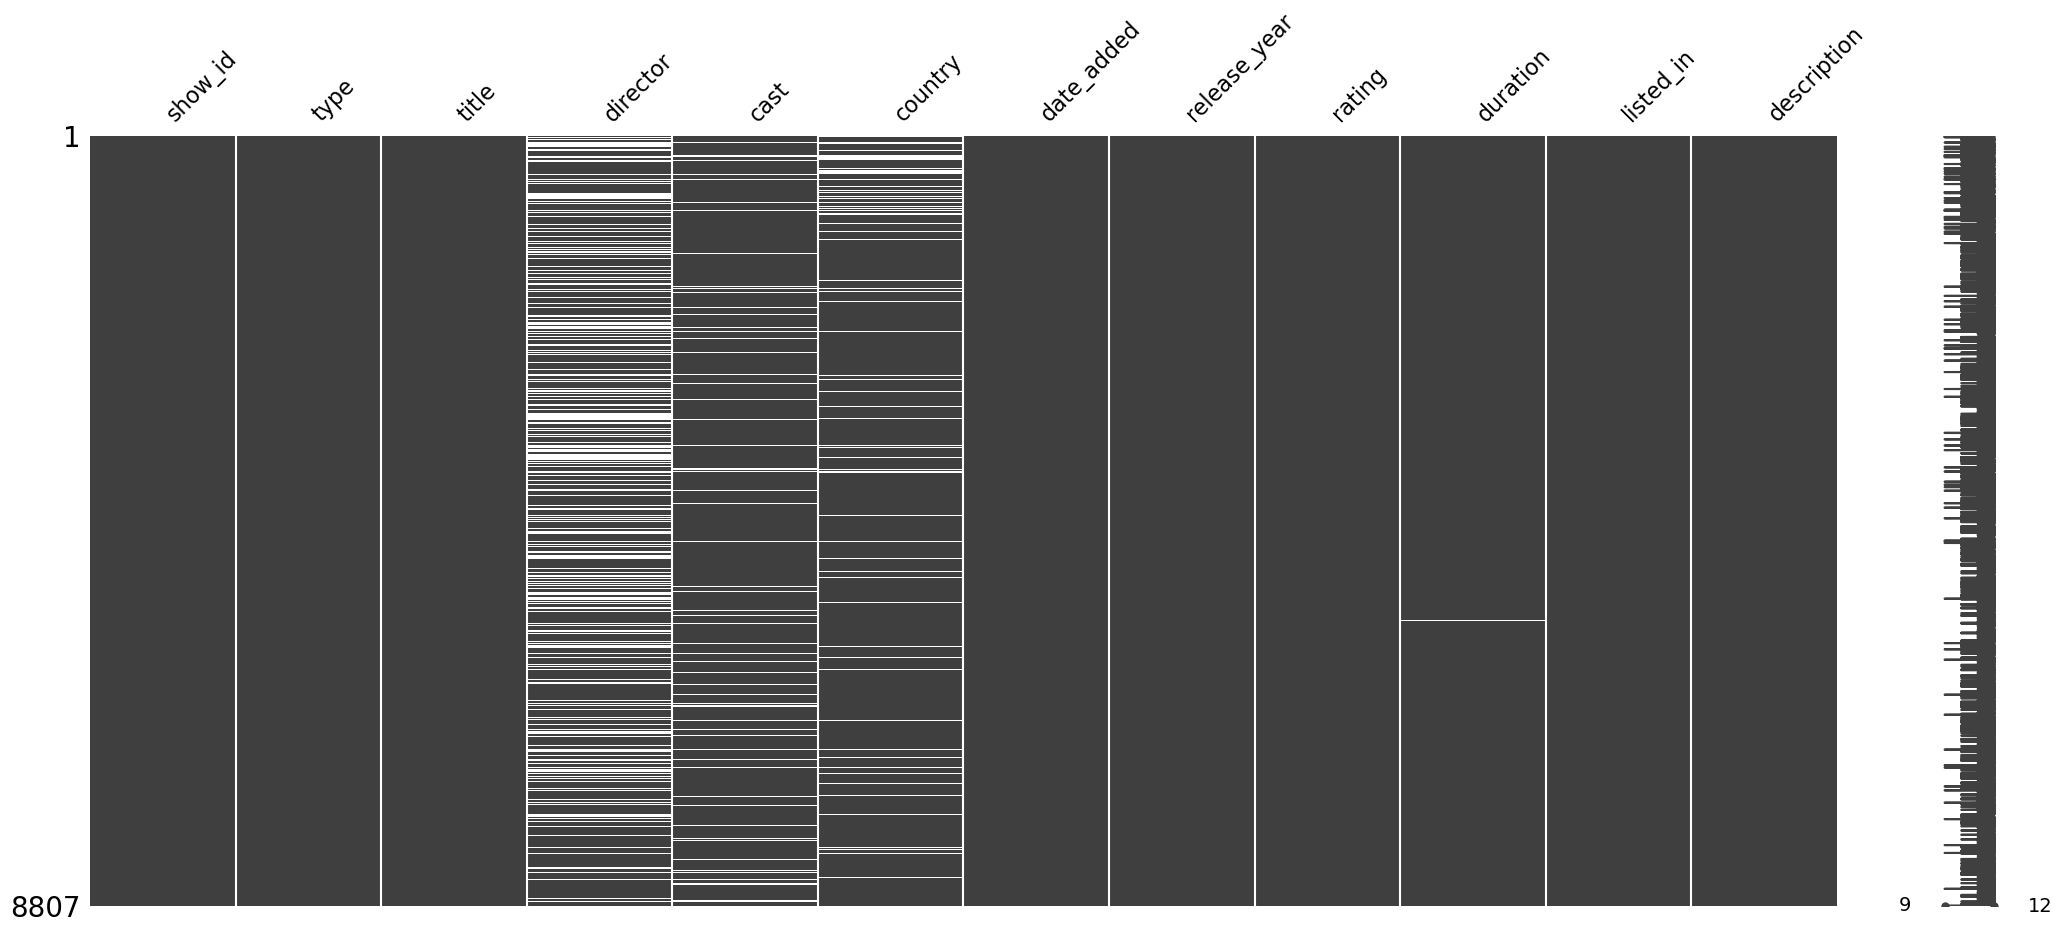

In [113]:
msno.matrix(df)

<Axes: >

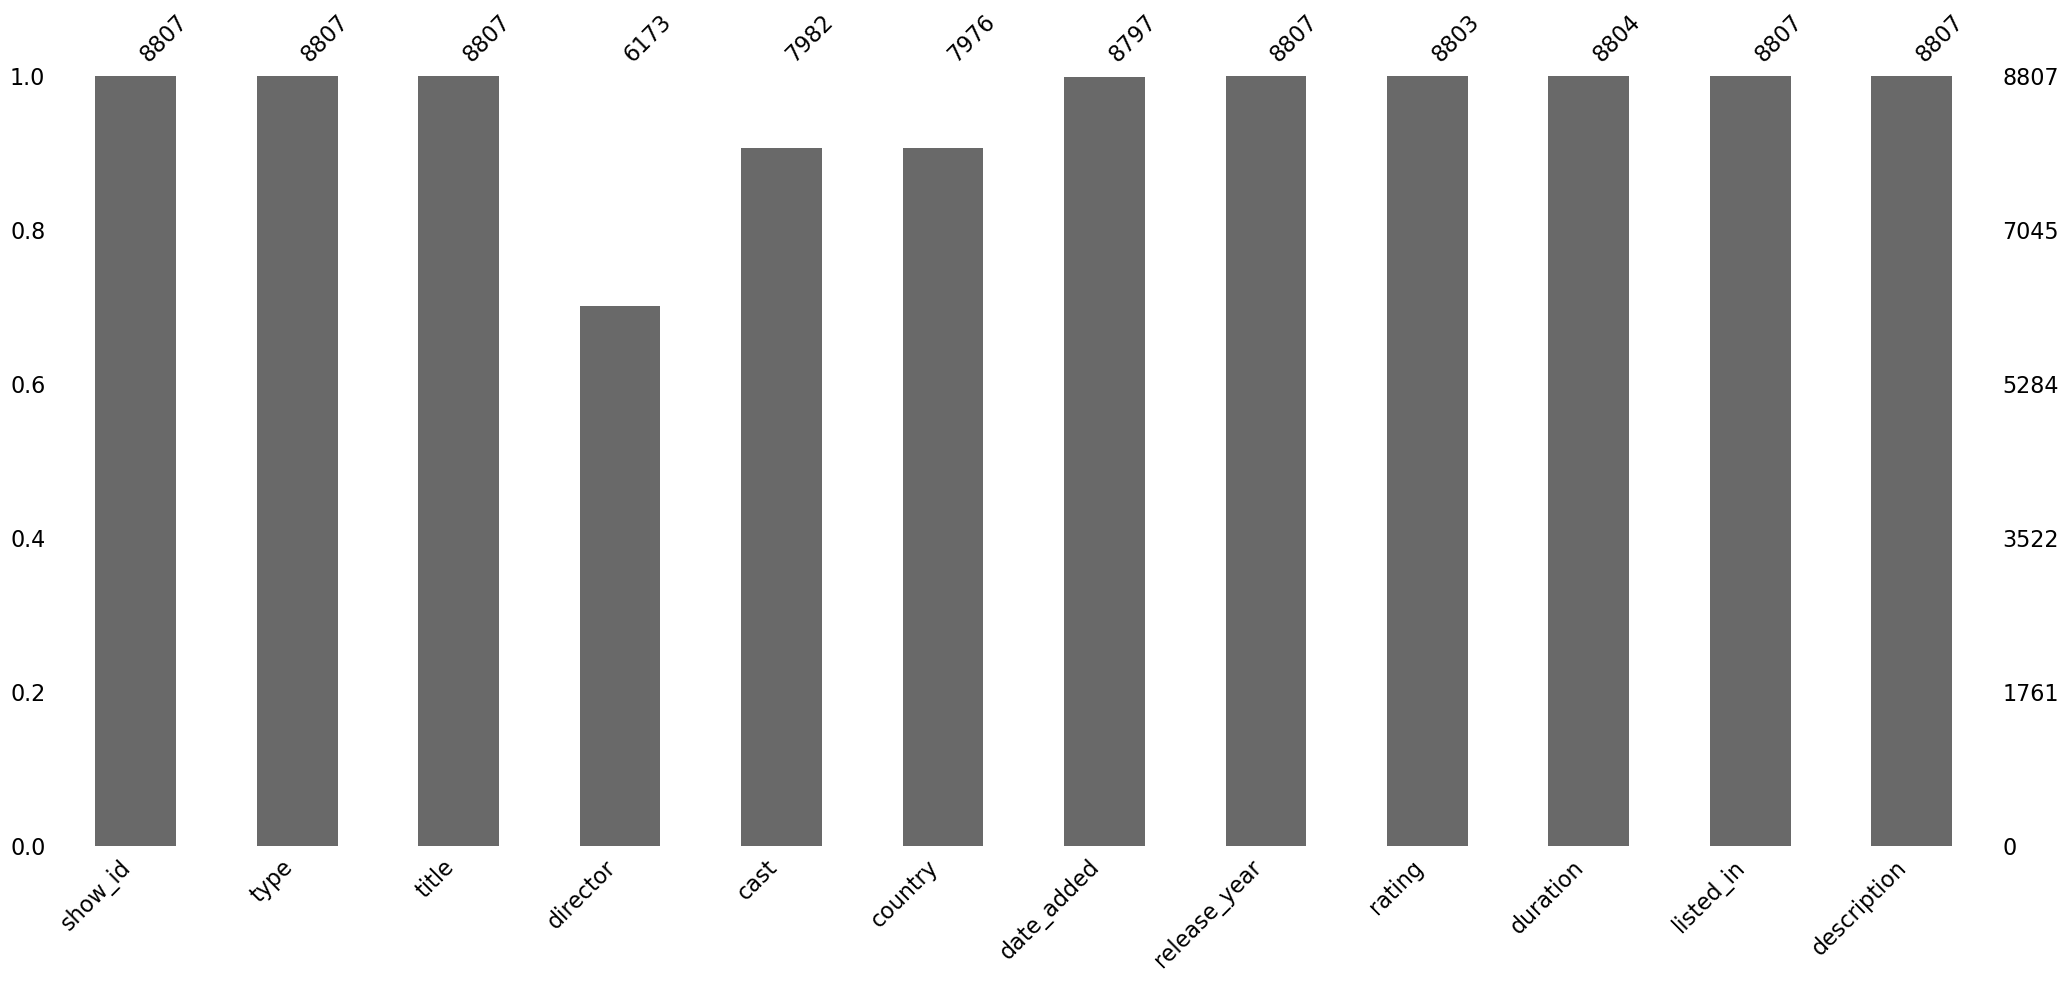

In [114]:
msno.bar(df)

<Axes: >

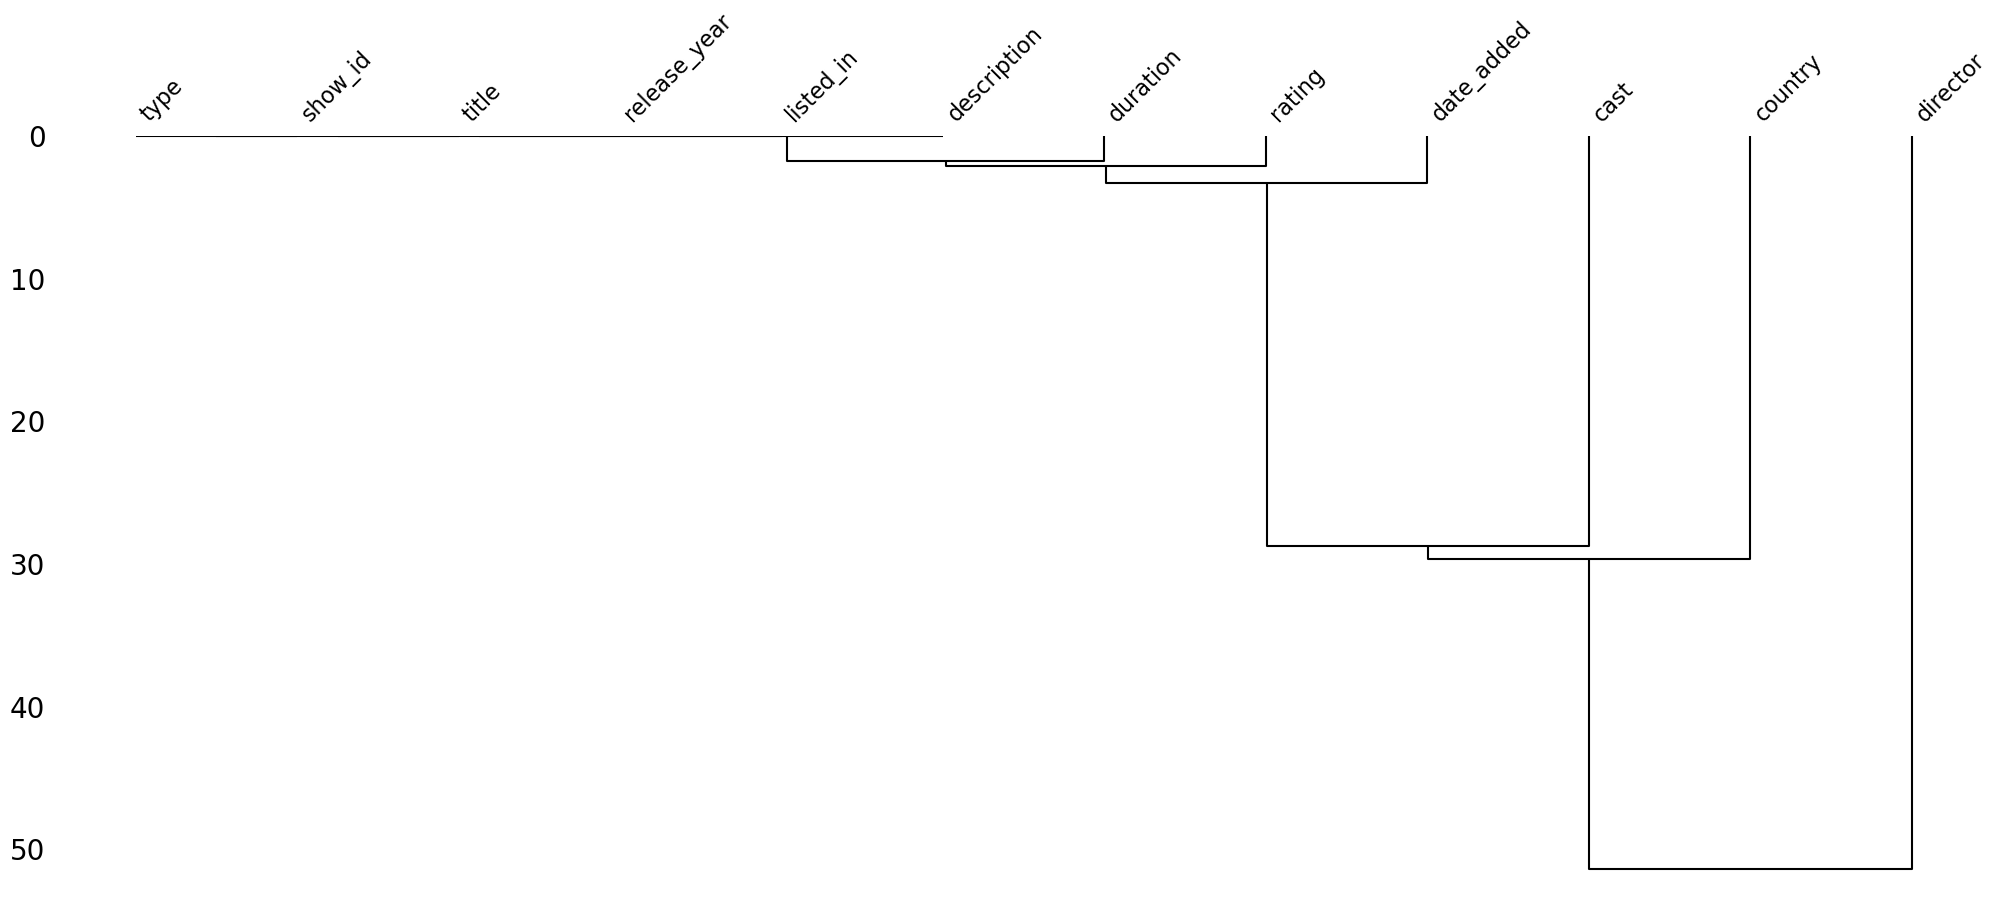

In [115]:
msno.dendrogram(df)

1. Faire une interprétation des différents graphes.
2. Faire une comparaison entre la heatmap de misssingno et seaborn.
3. Localiser les valeurs manquantes.

## Question 11 : Afficher une observation aléatoire de la df 
n est le nombre d'observation

In [116]:
df.sample(n=1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7904,s7905,Movie,Running for Grace,David L. Cunningham,"Ryan Potter, Matt Dillon, Jim Caviezel, Olivia...",United States,"June 19, 2019",2018,TV-14,110 min,"Dramas, Romantic Movies","In 1920s Hawaii, a young man of mixed race and..."


## Question 12 : Affichez toutes lesinformations de l'œuvre “CatchMeIfYouCan”

In [117]:
df[df['title'] == 'Catch Me If You Can']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","August 1, 2021",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...


## Question 13 : Affichez le nom du film le plus récent du dataset
- si j'execute uniquement cette cellule, ça ne va pas marcher, il faut d'abord convertir la colonne date_added en type datetime (question 15)
- idmax() renvoie l’index (la ligne) où la valeur est maximale dans la colonne.

In [118]:
films = df[df['type'] == 'Movie']
film_plus_recent = films.loc[films['date_added'].idxmax(), 'title']

In [119]:
film_plus_recent

'Blood Brothers: Malcolm X & Muhammad Ali'

## Question 14 : Affichez le nom de la série la plus récente du dataset (same thing as films)
- S'assurer que la colonne 'date_added' est bien en format datetime
- Filtrer uniquement les séries
- Trouver la série la plus récente

In [132]:
series = df[df['type'] == 'TV Show']
serie_plus_recente = series.loc[series['date_added'].idxmax(), 'title']

In [133]:
print(serie_plus_recente)

Blood & Water


## Question 15 : Modifier le type de la variable date_added de object vers datetime

- pd.to_datetime(..., errors='coerce') : convertit en date. Les valeurs non valides seront remplacées par NaT (comme NaN, mais pour les dates).

- .loc est une méthode très puissante de pandas qui permet d'accéder aux lignes et colonnes d’un DataFrame par leurs étiquettes (labels), et non par leur position.

In [123]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

## Question 16 & 17 : Modifier le type de la variable duration de str à numeric

In [124]:
# Etape 1 : Créer une copie propre de la colonne 'duration' avec uniquement la valeur numérique extraite
df['duration_clean'] = df['duration'].astype(str).str.extract(r'(\d+)').astype(float)

In [125]:
# Etape 2 : Remplacer la colonne 'duration' par la version numérique, en fonction du type
df.loc[df['type'] == 'Movie', 'duration'] = df.loc[df['type'] == 'Movie', 'duration_clean']
df.loc[df['type'] == 'TV Show', 'duration'] = df.loc[df['type'] == 'TV Show', 'duration_clean']

In [126]:
# Etape 3 : Supprimer la colonne temporaire
df.drop(columns=['duration_clean'], inplace=True)

In [127]:
# Convertir en int pour enlever les décimales si tu veux
df['duration'] = df['duration'].astype('float')  # type nullable si certains sont NaN

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   float64       
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 825.8+ KB


In [129]:
df.dtypes.value_counts()

object            9
datetime64[ns]    1
int64             1
float64           1
Name: count, dtype: int64

## Question 18 : Modifiez la variable listed_in de telle sorte que la chaîne de caractères soit une liste de chaîne de caractères :

- .astype(str) : force toutes les valeurs de la colonne à être des chaînes de caractères (au cas où certaines valeurs ne le seraient pas, comme des NaN, objets, etc.)
- .apply(...) : applique une fonction personnalisée à chaque ligne (chaque cellule) de la colonne.
- lambda x: [...] : C’est une fonction anonyme (lambda) qui prend une valeur x (chaque ligne de la colonne) et retourne une nouvelle version transformée.
- x.split(',') : coupe la chaîne x à chaque virgule. Elle retourne une liste de morceaux.

In [130]:
df['listed_in'] = df['listed_in'].astype(str).apply(lambda x: [genre.strip() for genre in x.split(',')])

In [131]:
df['listed_in']

0                                         [Documentaries]
1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
                              ...                        
8802                     [Cult Movies, Dramas, Thrillers]
8803             [Kids' TV, Korean TV Shows, TV Comedies]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: listed_in, Length: 8807, dtype: object

## Question 19 : Affichez les valeurs uniques des variables : type, country, release_year,ratingetlisted_in.

In [134]:
# 1. Type
print("Valeurs uniques de 'type' :", df['type'].unique())

# 2. Country
print("\nValeurs uniques de 'country' :", df['country'].unique())

# 3. Release year
print("\nValeurs uniques de 'release_year' :", df['release_year'].unique())

# 4. Rating
print("\nValeurs uniques de 'rating' :", df['rating'].unique())

# 5. Listed_in
print("\nValeurs uniques de 'listed_in' :")
listed_in_unique = set([genre for sublist in df['listed_in'] for genre in sublist])
print(sorted(listed_in_unique))

Valeurs uniques de 'type' : ['Movie' 'TV Show']

Valeurs uniques de 'country' : ['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong K